# Train a Custom  Model from scratch

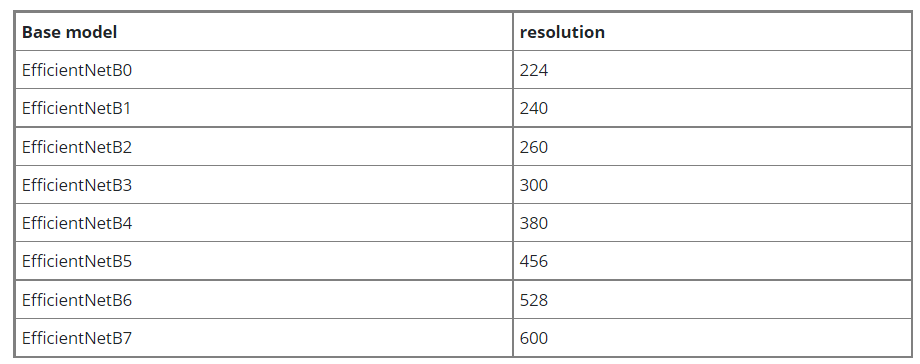

## Data Prerocessing

In [1]:
import numpy as np
import tensorflow as tf
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data_II')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['0_background', '1_trash', '2_paper', '3_plastic', '4_metal', '5_electronic_invoice', '6_bubble_wrap', '7_thin_plastic_bag', '8_fruit_mesh_bag', '9_thin_film_paper_cup']
Types of classes labels found:  10


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data_II' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

         Labels                                image
0  0_background  dataset_path/0_background/00000.png
1  0_background  dataset_path/0_background/00001.png
2  0_background  dataset_path/0_background/00002.png
3  0_background  dataset_path/0_background/00003.png
4  0_background  dataset_path/0_background/00004.png
                     Labels                                         image
2542  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00151.png
2543  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00152.png
2544  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00153.png
2545  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00154.png
2546  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00155.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2547
Labels
1_trash                  500
2_paper                  441
4_metal                  427
5_electronic_invoice     245
6_bubble_wrap            215
3_plastic                207
7_thin_plastic_bag       195
9_thin_film_paper_cup    156
8_fruit_mesh_bag         130
0_background              31
Name: count, dtype: int64


In [5]:
import cv2
path = 'C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data_II/'
dataset_path = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data_II')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(2547, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['0_background' '0_background' '0_background' ... '9_thin_film_paper_cup'
 '9_thin_film_paper_cup' '9_thin_film_paper_cup']
[0 0 0 ... 9 9 9]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(2419, 224, 224, 3)
(2419, 10)
(128, 224, 224, 3)
(128, 10)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 10
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [12]:
model = tf.keras.Model(inputs, outputs)


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hist = model.fit(train_x, train_y, epochs=40, verbose=2,validation_data=(test_x, test_y), callbacks=[tensorboard_callback])

model.save("V7_40ep_custom_II.h5")


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 10)                4062381   
 )                                                               
                                                                 


Total params: 4062381 (15.50 MB)
Trainable params: 4020358 (15.34 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/40
76/76 - 616s - loss: 2.6753 - accuracy: 0.3807 - val_loss: 2.5418 - val_accuracy: 0.0938 - 616s/epoch - 8s/step
Epoch 2/40
76/76 - 558s - loss: 1.2023 - accuracy: 0.6387 - val_loss: 2.7993 - val_accuracy: 0.1953 - 558s/epoch - 7s/step
Epoch 3/40
76/76 - 434s - loss: 0.7310 - accuracy: 0.7598 - val_loss: 3.2949 - val_accuracy: 0.0938 - 434s/epoch - 6s/step
Epoch 4/40
76/76 - 506s - loss: 0.6124 - accuracy: 0.8210 - val_loss: 4.5503 - val_accuracy: 0.0078 - 506s/epoch - 7s/step
Epoch 5/40
76/76 - 468s - loss: 0.4773 - accuracy: 0.8541 - val_loss: 4.5505 - val_accuracy: 0.0938 - 468s/epoch - 6s/step
Epoch 6/40
76/76 - 444s - loss: 0.2967 - accuracy: 0.9041 - val_loss: 5.8574 - val_accuracy: 0.1953 - 444s/epoch - 6s/step
Epoch 7/40
76/76 - 434s - loss: 0.2911 - accuracy: 0.9111 - val_loss: 4.3967 - val_acc

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


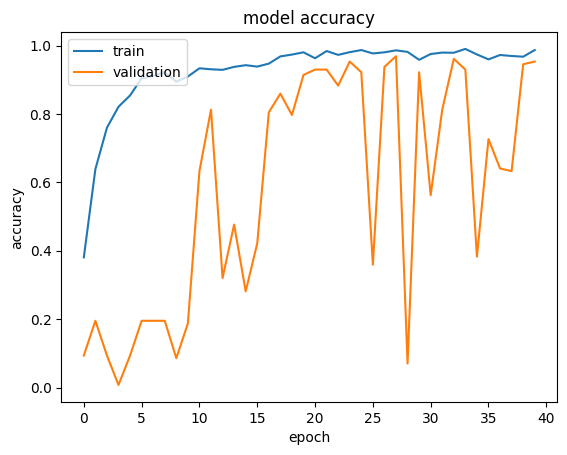

In [13]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [14]:
# from tensorflow import keras
# model = keras.models.load_model("model_0811.h5")

preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 [==============================] - 3s 705ms/step - loss: 0.1767 - accuracy: 0.9531
Loss = 0.1766582727432251
Test Accuracy = 0.953125


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


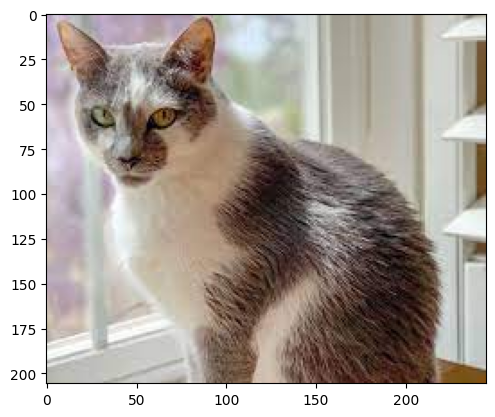

In [36]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'C:\\Users\\ASUS\\Desktop\\HPS\\EfficientNet\\predict_sample\\unseen_imagenet.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [37]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 1s 1s/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [39]:
# %%timeit -n1 -r1 
# with tf.device('/CPU:0'):
#     cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     cpu_performance

In [40]:

# %%timeit -n1 -r1 
# with tf.device('/GPU:0'):
#     gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
#     gpu_performance

In [41]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds